In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/kaggle/input/superstore/Sample - Superstore.csv', encoding='latin-1') 
except UnicodeDecodeError as e:
    print(f"Error reading file: {e}")

**Basic Data Exploration**

In [2]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Data cleaning and preprocessing**

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Checking for missing values**

In [5]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


**Check for duplicates**

In [6]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


**Exploratory Data Analysis (EDA)**

In [7]:
print(df.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355392   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

**Sales and Profit Over Time**

<ipython-input-8-dd40ad750890>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
<ipython-input-8-dd40ad750890>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df.resample('M', on='Order Date')['Profit'].sum()


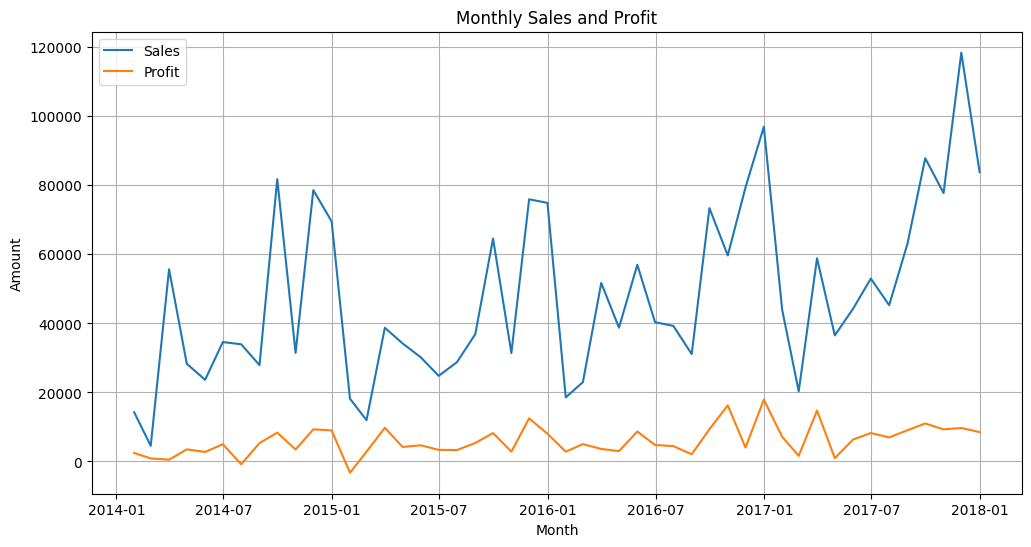

In [8]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_profit = df.resample('M', on='Order Date')['Profit'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Sales')
plt.plot(monthly_profit.index, monthly_profit.values, label='Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Sales and Profit')
plt.legend()
plt.grid(True)
plt.show()

**Category-wise Sales and Profit**

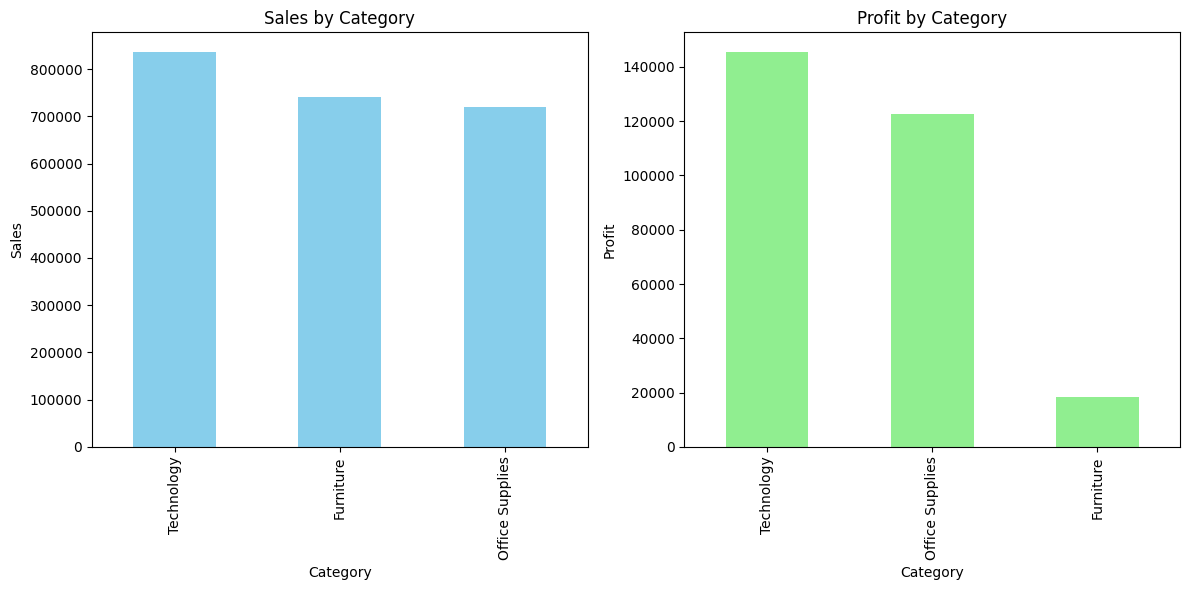

In [9]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
category_profit.plot(kind='bar', color='lightgreen')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()